# Solution hints for exercise sheet 4

## Exercise 1
First, stability of an equilibrium $x^*$ corresponds to uniform (in $t$) continuity of $\varphi_t(\cdot)$ at $x^*$. The uniformity is crucial, it states that for any $\varepsilon>0$ you can find a $\delta>0$ such that for *any* $t>0$ and any $x$ with $\lvert x-x^*\rvert<\delta$ we have $\lvert\varphi_t(x)-\varphi_t(x^*)\rvert<\varepsilon$. In particular, your choice of $\delta$ (given $\varepsilon$) has to work for all times, you can't modify it as you change $t$. This is in strong contrast to simply stating that the maps $\varphi_t$ shall be continuous at $x^*$ for any $t$. Think about it!

As for the second part, clearly attractivity does *not* imply stability, and we had a number of good examples on the blackboard. As an example, consider the following ODE in polar coordinates:

$$ \dot{r} = r(1-r),$$
$$ \dot{\theta} = \sin^2(\theta/2).$$

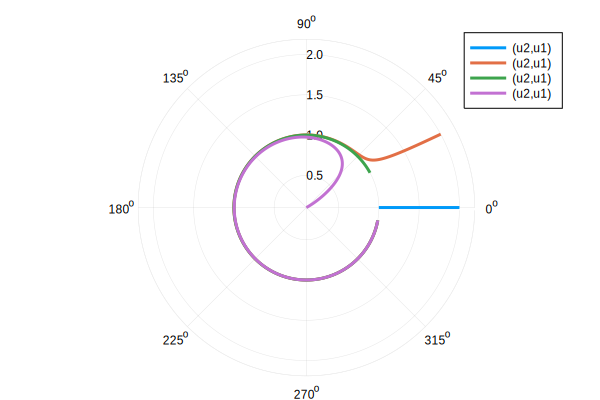

In [1]:
using DiffEqBase, OrdinaryDiffEq, Plots
gr() # use GR plotting backend
const tmin, tmax = 0.0, 30.0
function odefun(du,u,p,t) # function in polar coordinates
    du[1] = u[1] * (1.0 - u[1])
    du[2] = sin(u[2]/2)^2
end
# set up a couple of initial conditions in polar coordinates
ICs = [[2.0 0.0], [2.0 0.5], [1.0 0.5], [0.1 0.5]]
function flow(x0)
    prob = ODEProblem(odefun, x0, (tmin, tmax))
    solve(prob,Tsit5())
end
sol = map(flow,ICs)
fig = plot()
for s in sol
    plot!(s,vars=(2,1),proj=:polar)
end
plot(fig)

Spot the attracting but unstable equilibrium!

Another example (which was presented in the tutorial) is to consider dynamics on a circle with dynamics given by the $\theta$-equation above.

## Exercise 2
Admittedly, this is a hard problem. Some first thoughts, somewhat simplifying the problem, could be these: 
1. Topological equivalence is an equivalence relation, so it suffices to show topological equivalence to one simple linear system. We don't need to show topological equivalence between arbitrary $A$ and $B$, but only between $A$ and some simple standard system.
2. Perhaps the simplest standard system having $n_+$ eigenvalues with positive and $n_-$ with negative real parts is (in block notation) $\text{diag}(I_{n_+},I_{n_-})$.
That's a good start, since it is not hard to see that any two direct sums of dynamical systems $(\varphi_1,\varphi_2)$ and $(\theta_1,\theta_2)$, whose first and second factors are topologically equivalent, respectively, are again topologically equivalent. Next, we observe that hyperbolic linear systems do admit a state space decomposition into decoupled dynamics: the stable and the unstable subspaces. So according to our preparatory thoughts above, we should aim at proving that any stable hyperbolic linear system is topologically conjugate to $\dot{x} = -x$.

We don't show the most general case, but proceed with increasingly complex special cases.
1. Consider $A = -\lambda I$, $\lambda>0$, i.e., $A$ has a multiple eigenvalue $-\lambda$ with coinciding algebraic and geometric multiplicity. We build a homeomorphism following the approach:
    * Use polar coordinates.
    * For some $(r_0,\theta_0)$, solve for the elapsed time it has taken to get there from $(1,\theta_0)$ under the      $exp(-I)$-dynamics. This gives $\tau = -\log(r_0)$.
    * Map $(r_0,\theta_0)$ to the point $(exp(-\tau\lambda),\theta_0)=(r_0^{-\lambda},\theta_0)$.
   Together with the above considerations, this solves the case when $A$ is hyperbolic and all eigenvalues have    a diagonal Jordan block.
2. It remains to construct the homeomorphism for cases in which we have non-diagonal Jordan blocks. Here, we would proceed in two steps:
    * First show that $-\lambda I+N$ is topologically conjugate to $-\lambda I$. 
    * Apply step 1. above.
   As for the first one, consider exercise 4 on sheet 5.

The general case with Jordan blocks of arbitrary size follows essentially the same procedure, but the construction of the reference set (the unit circle above) is a bit more technical.
   
## Exercise 3
The two systems are similar:

In [2]:
A = [-1 -3; -3 -1]
B = [2 0; 0 -4]
Q = √2/2*[1 -1; 1 1]
P = [0 1; 1 0]
eig(A), B ≈ Q*A*Q'

(([-4.0, 2.0], [0.707107 -0.707107; 0.707107 0.707107]), true)

Hence, they can be conjugated via their similarity transformation $Q$.

## Exercise 4
The phase portrait is best obtained from the fact that the pendulum admits a first integral, the total energy; see an earlier exercise sheet. Plotting level sets on the phase space and adding arrows to the right in the upper half and arrows to the left in the lower half does the job.

We find equilibria at $(x^*,0)$, where $x^*=k*\pi$, $k\in\mathbb{Z}$, the roots of $\sin$. For even $k$, we obtain non-hyperbolic equilibria, whose stability follows from Lyapunov's direct method with the energy function as Lyapunov function. For odd $k$, we obtain hyperbolic equilibria, with one-dimensional stable and unstable subspaces (and hence invariant manifolds).

For the approximation of the invariant manifolds, we heavily exploit their proven properties (see the invariant manifold theorem). We may make an ansatz

$$ y = h(x)$$

where the graph of $h$ equals the (un)stable manifold. It is guaranteed to be as smooth as the vector field, hence we may first shift the coordinate system $(x,y) \mapsto (x-\pi,y)$, and in the new coordinate system Taylor expand $h$, with unknown coefficients $h_0,h_1,h_2,...$. By invariance, for a point $(x_0,y_0)$ for which $y_0 = h(x_0)$ we have that 

$$y(t) = h(x(t)) \text{ for all }t>0,$$

where $x(t)$ is a shorthand notation for the first component of the flow $\varphi_t(x_0,y_0)$ (and similar for $y(t)$. In particular, we may differentiate this identity w.r.t. $t$ (both the flow and $h$ are differentiable!), and obtain

$$\dot{y} = h'(x)\dot{x} = h'(x)y = h'(x)h(x)$$

which is a product of two Taylor series in $x$ with unknown coefficients, which is again a Taylor series in $x$. Again by invariance, we must have

$$\dot{y} = \sin(x),$$

which can be Taylor expanded and the coefficients can be determined by coefficient comparison with the above.